In [321]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option


df = pd.read_excel('Blood Pressure Data.xlsx', parse_dates=['Date'],index_col='Date' )
df

,Time,Systolic (mmHg),Diastolic (mmHg),Pulse (bpm),Symptoms,Consumed,Notes
Date,,,,,,,
2025-06-07 22:39:29,10:39 pm,96,66,84,-,-,-
2025-06-07 15:57:12,3:57 pm,97,66,89,-,-,-
2025-06-07 13:55:22,1:55 pm,99,70,69,-,-,-
2025-06-07 13:53:08,1:53 pm,113,72,96,-,-,-
2025-06-07 13:52:09,1:52 pm,105,60,61,-,-,-
...,...,...,...,...,...,...,...
2025-04-05 12:12:55,12:12 pm,105,71,87,-,-,-
2025-04-05 00:34:59,12:34 am,123,78,90,-,-,-
2025-04-04 16:02:42,4:02 pm,108,72,99,-,-,-


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

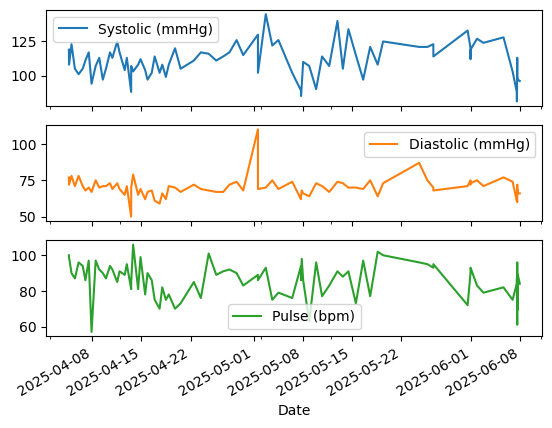

In [323]:
# quick look at our variables plotted over time
df.plot(subplots=True)

In [324]:
# quick look at data
df.describe()

,Systolic (mmHg),Diastolic (mmHg),Pulse (bpm)
count,85.000000,85.000000,85.000000
mean,110.823529,70.152941,86.564706
std,12.307737,6.776194,9.848189
min,81.000000,50.000000,57.000000
25%,103.000000,67.000000,81.000000
50%,111.000000,70.000000,89.000000
75%,119.000000,73.000000,94.000000
max,145.000000,110.000000,106.000000


In [327]:
# find the min date
df.index.min()

Timestamp('2025-04-04 15:40:01')

**Q: Find the last observations of each month**

In [330]:
df.resample('M').last()

/var/folders/p_/47c1l4ln21l4ts84bdv0kk840000gq/T/ipykernel_39895/3013020464.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').last()


,Time,Systolic (mmHg),Diastolic (mmHg),Pulse (bpm),Symptoms,Consumed,Notes
Date,,,,,,,
2025-04-30,12:08 pm,115,68,83,-,-,-
2025-05-31,10:06 pm,119,73,93,-,-,-
2025-06-30,10:39 pm,96,66,84,-,-,-


Q: **Find the average syslolic blood pressure on a weekly basis**

In [333]:
# find the average syslolic blood pressure on a weekly basis
Weekly_sys_avg =  df['Systolic (mmHg)'].resample('W').mean().round(2)
Weekly_sys_avg

Date
2025-04-06    110.43
2025-04-13    108.19
2025-04-20    106.58
2025-04-27    114.33
2025-05-04    123.71
2025-05-11     99.67
2025-05-18    117.14
2025-05-25    122.33
2025-06-01    120.88
2025-06-08    103.40
Freq: W-SUN, Name: Systolic (mmHg), dtype: float64

In [335]:
# Convert the Series to a DataFrame with column name
# note think of resampling like a 'group by' but for time-indexed-data
Weekly_sys_avg_df = Weekly_sys_avg.to_frame(name='Systolic (mmHg)_avg')
Weekly_sys_avg_df

,Systolic (mmHg)_avg
Date,
2025-04-06,110.43
2025-04-13,108.19
2025-04-20,106.58
2025-04-27,114.33
2025-05-04,123.71
2025-05-11,99.67
2025-05-18,117.14
2025-05-25,122.33
2025-06-01,120.88


<Axes: xlabel='Date'>

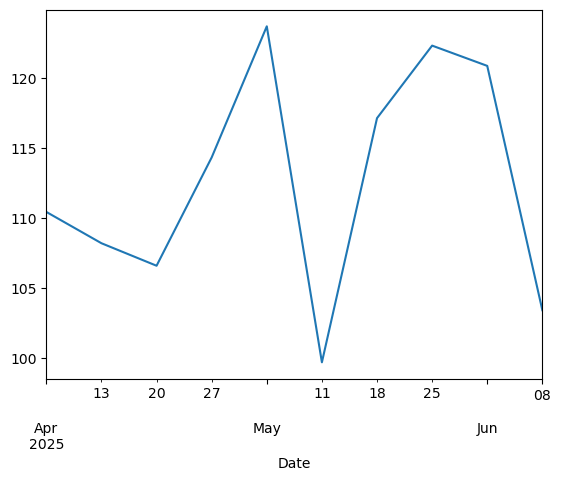

In [337]:
Weekly_sys_avg_df['Systolic (mmHg)_avg'].resample('W').mean().plot()

Q: **Find the avg weekly percentage change for systololic blood pressure**

In [340]:
Weekly_sys_avg_df['pct_change'] = Weekly_sys_avg_df['Systolic (mmHg)_avg'].pct_change().mul(100).round(2)

In [342]:
Weekly_sys_avg_df

,Systolic (mmHg)_avg,pct_change
Date,,
2025-04-06,110.43,NaN
2025-04-13,108.19,-2.03
2025-04-20,106.58,-1.49
2025-04-27,114.33,7.27
2025-05-04,123.71,8.20
2025-05-11,99.67,-19.43
2025-05-18,117.14,17.53
2025-05-25,122.33,4.43
2025-06-01,120.88,-1.19


<Axes: xlabel='Date'>

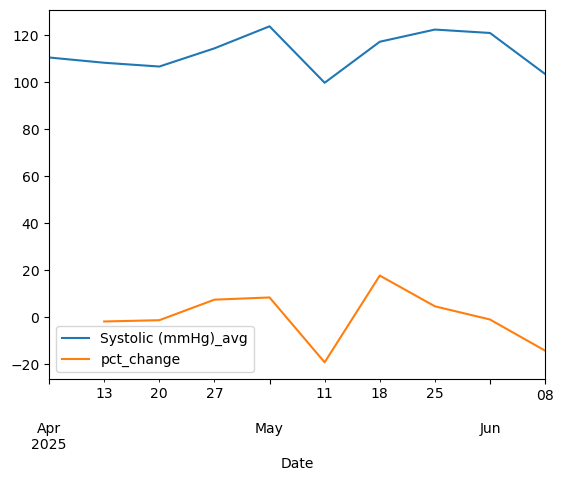

In [344]:
# plot the weekly avg vs pct change
Weekly_sys_avg_df.plot()

<Axes: xlabel='Date'>

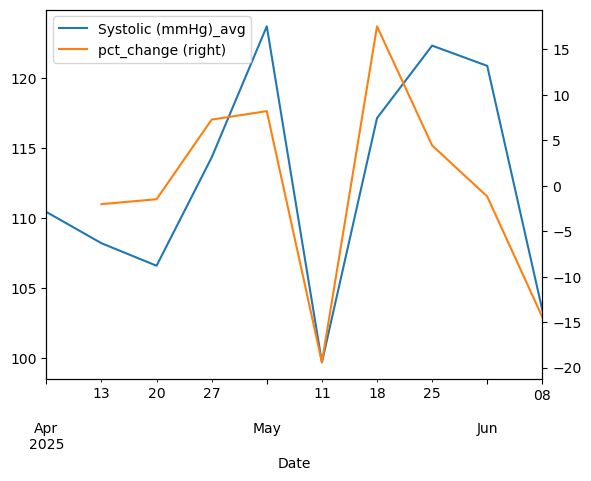

In [346]:
# plot weekly avg vs pct change with pct chanec on the secondary y-axis
Weekly_sys_avg_df.plot(secondary_y='pct_change')

Q: **Which hour has the largest avg Systolic blood pressure?**

In [349]:
df['Systolic (mmHg)'].resample('H').mean().sort_values(ascending=False)

/var/folders/p_/47c1l4ln21l4ts84bdv0kk840000gq/T/ipykernel_39895/779498899.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Systolic (mmHg)'].resample('H').mean().sort_values(ascending=False)


Date
2025-05-02 17:00:00    145.0
2025-05-12 22:00:00    140.0
2025-05-14 12:00:00    134.0
2025-05-31 12:00:00    133.0
2025-06-05 14:00:00    128.0
                       ...  
2025-06-07 17:00:00      NaN
2025-06-07 18:00:00      NaN
2025-06-07 19:00:00      NaN
2025-06-07 20:00:00      NaN
2025-06-07 21:00:00      NaN
Name: Systolic (mmHg), Length: 1544, dtype: float64

Q: **Show the monthly average for systolic, diastolic, and BPM using subplots (downsampling)**

In [352]:
df[['Systolic (mmHg)', 'Diastolic (mmHg)', 'Pulse (bpm)']].resample('M').mean().round(2)

/var/folders/p_/47c1l4ln21l4ts84bdv0kk840000gq/T/ipykernel_39895/1404925444.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[['Systolic (mmHg)', 'Diastolic (mmHg)', 'Pulse (bpm)']].resample('M').mean().round(2)


,Systolic (mmHg),Diastolic (mmHg),Pulse (bpm)
Date,,,
2025-04-30,109.53,69.21,87.28
2025-05-31,114.48,72.03,87.61
2025-06-30,105.55,68.55,80.82


/var/folders/p_/47c1l4ln21l4ts84bdv0kk840000gq/T/ipykernel_39895/576089002.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[['Systolic (mmHg)', 'Diastolic (mmHg)', 'Pulse (bpm)']].resample('M').mean().round(2).plot(subplots=True)


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

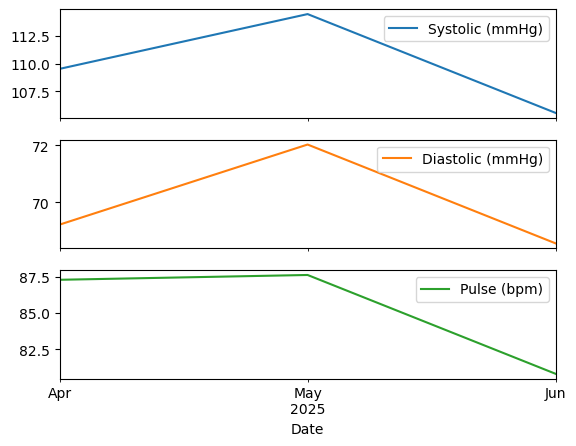

In [354]:
df[['Systolic (mmHg)', 'Diastolic (mmHg)', 'Pulse (bpm)']].resample('M').mean().round(2).plot(subplots=True)

Q:**Find the weekly mean, median, and std BPM. Then plot all on the same chart.**

In [357]:
df['Pulse (bpm)'].resample('W').agg(['mean', 'median', 'std']).round(2)

,mean,median,std
Date,,,
2025-04-06,95.00,96.0,4.97
2025-04-13,89.00,90.5,10.44
2025-04-20,79.75,78.0,8.57
2025-04-27,89.00,90.0,8.27
2025-05-04,85.00,86.0,6.40
2025-05-11,84.33,86.0,11.19
2025-05-18,88.43,91.0,10.33
2025-05-25,97.00,96.0,2.65
2025-06-01,88.50,91.0,7.58


<Axes: xlabel='Date'>

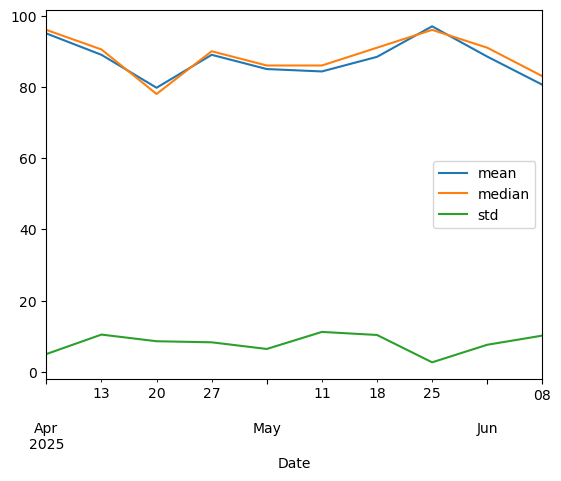

In [359]:
df['Pulse (bpm)'].resample('W').agg(['mean', 'median', 'std']).round(2).plot()

# Rolling Averages
A rolling average is calculated by taking the average of a fixed number of consecutive data points within a defined window or period.
As the window moves through the dataset, the average is recalculated for each new subset of data points.


**Q: Calculate the moving average for the preceding 3 records**

In [363]:
df[['Systolic 3 avg']] = df[['Systolic (mmHg)']].rolling(window=3).mean()

In [365]:
df

,Time,Systolic (mmHg),Diastolic (mmHg),Pulse (bpm),Symptoms,Consumed,Notes,Systolic 3 avg
Date,,,,,,,,
2025-06-07 22:39:29,10:39 pm,96,66,84,-,-,-,NaN
2025-06-07 15:57:12,3:57 pm,97,66,89,-,-,-,NaN
2025-06-07 13:55:22,1:55 pm,99,70,69,-,-,-,97.333333
2025-06-07 13:53:08,1:53 pm,113,72,96,-,-,-,103.000000
2025-06-07 13:52:09,1:52 pm,105,60,61,-,-,-,105.666667
...,...,...,...,...,...,...,...,...
2025-04-05 12:12:55,12:12 pm,105,71,87,-,-,-,103.666667
2025-04-05 00:34:59,12:34 am,123,78,90,-,-,-,109.666667
2025-04-04 16:02:42,4:02 pm,108,72,99,-,-,-,112.000000


In [367]:
# checking
(96+99+97)/3

97.33333333333333

In [369]:
(113+99+97)/3

103.0

**Q: Calculate the running total (or cumulitive sum) for BMP**

In [372]:
df['Pulse (bpm)'].cumsum()

Date
2025-06-07 22:39:29      84
2025-06-07 15:57:12     173
2025-06-07 13:55:22     242
2025-06-07 13:53:08     338
2025-06-07 13:52:09     399
                       ... 
2025-04-05 12:12:55    6970
2025-04-05 00:34:59    7060
2025-04-04 16:02:42    7159
2025-04-04 15:59:59    7258
2025-04-04 15:40:01    7358
Name: Pulse (bpm), Length: 85, dtype: int64

In [374]:
df['Pulse (bpm) cum sum'] = df['Pulse (bpm)'].cumsum()
df

,Time,Systolic (mmHg),Diastolic (mmHg),Pulse (bpm),Symptoms,Consumed,Notes,Systolic 3 avg,Pulse (bpm) cum sum
Date,,,,,,,,,
2025-06-07 22:39:29,10:39 pm,96,66,84,-,-,-,NaN,84
2025-06-07 15:57:12,3:57 pm,97,66,89,-,-,-,NaN,173
2025-06-07 13:55:22,1:55 pm,99,70,69,-,-,-,97.333333,242
2025-06-07 13:53:08,1:53 pm,113,72,96,-,-,-,103.000000,338
2025-06-07 13:52:09,1:52 pm,105,60,61,-,-,-,105.666667,399
...,...,...,...,...,...,...,...,...,...
2025-04-05 12:12:55,12:12 pm,105,71,87,-,-,-,103.666667,6970
2025-04-05 00:34:59,12:34 am,123,78,90,-,-,-,109.666667,7060
2025-04-04 16:02:42,4:02 pm,108,72,99,-,-,-,112.000000,7159


In [376]:
# sum is equal to the final record in cum sum column as it is a running total
df['Pulse (bpm)'].sum()

7358

**Q: populate the cumultive product of BPM**

In [379]:
df[['Pulse (bpm)']].cumprod()

,Pulse (bpm)
Date,
2025-06-07 22:39:29,84
2025-06-07 15:57:12,7476
2025-06-07 13:55:22,515844
2025-06-07 13:53:08,49521024
2025-06-07 13:52:09,3020782464
...,...
2025-04-05 12:12:55,0
2025-04-05 00:34:59,0
2025-04-04 16:02:42,0


# Time Series Correlation

In [382]:
df.columns

Index(['Time', 'Systolic (mmHg)', 'Diastolic (mmHg)', 'Pulse (bpm)',
       'Symptoms', 'Consumed', 'Notes', 'Systolic 3 avg',
       'Pulse (bpm) cum sum'],
      dtype='object')

In [384]:
change = df[['Systolic (mmHg)', 'Diastolic (mmHg)', 'Pulse (bpm)',]].pct_change().mul(100).round(2)
change

,Systolic (mmHg),Diastolic (mmHg),Pulse (bpm)
Date,,,
2025-06-07 22:39:29,NaN,NaN,NaN
2025-06-07 15:57:12,1.04,0.00,5.95
2025-06-07 13:55:22,2.06,6.06,-22.47
2025-06-07 13:53:08,14.14,2.86,39.13
2025-06-07 13:52:09,-7.08,-16.67,-36.46
...,...,...,...
2025-04-05 12:12:55,3.96,-8.97,-9.38
2025-04-05 00:34:59,17.14,9.86,3.45
2025-04-04 16:02:42,-12.20,-7.69,10.00


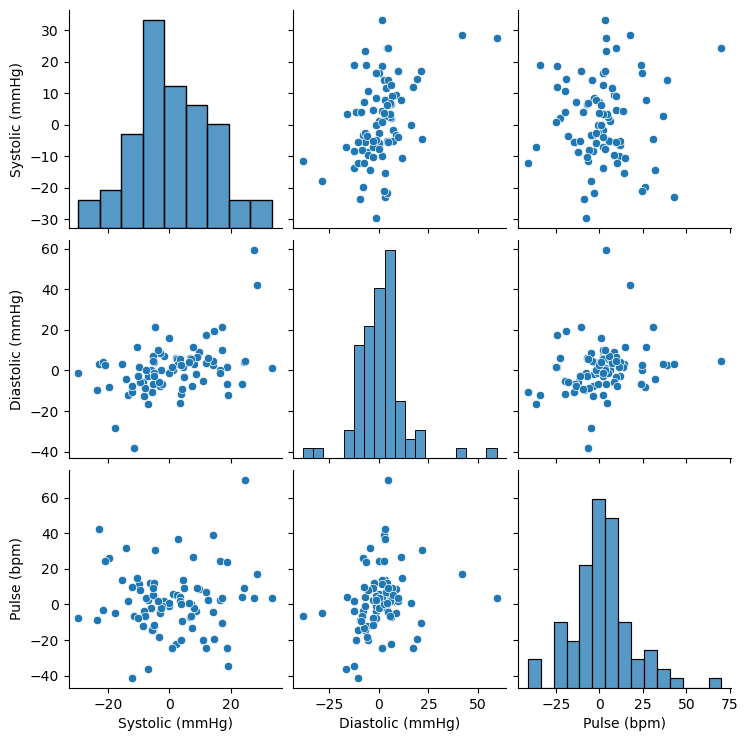

In [386]:
sns.pairplot(change)

In [387]:
change.corr()

,Systolic (mmHg),Diastolic (mmHg),Pulse (bpm)
Systolic (mmHg),1.000000,0.424266,0.034728
Diastolic (mmHg),0.424266,1.000000,0.225894
Pulse (bpm),0.034728,0.225894,1.000000


<Axes: >

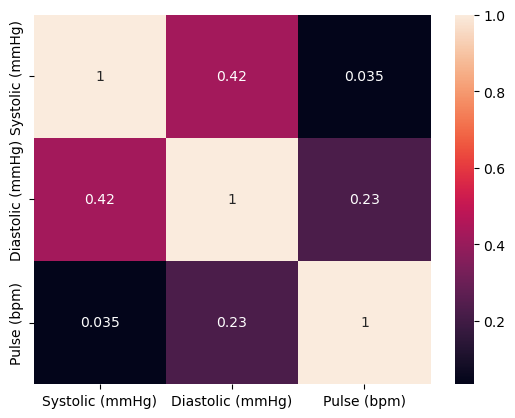

In [390]:
sns.heatmap(change.corr(), annot=True)